# Data understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
%matplotlib inline

### Data description

In [2]:
# import library to display multiple outputs
from IPython.display import display

# Importing dataset
data = pd.read_csv('D:/Master/CDS503 Machine Learning/Project/Dataset/StudentsPerformance.csv')

# see some of it, their overall statistics and dimensions
display(data.head(5))
display(data.describe())
display(data.shape)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


(1000, 8)

Checking null values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
# select rows from dataframe
x = data.iloc[:,:-1]

# sum of null data 
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

None null values available. Hence, no need to clean missing values during data pre-processing stage.

Visualizing the dataset

Comparison of all categorical attributes;
 * gender
 * race/ethnicity
 * parental level of education
 * lunch
 * test preparation course

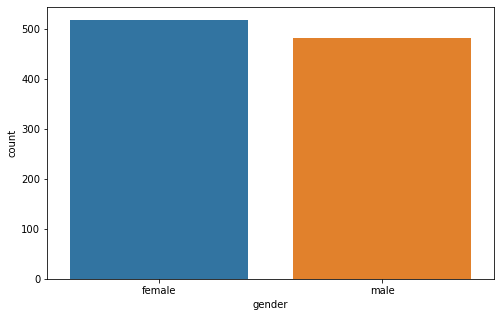

In [5]:
# comprison of gender feature (male, female)
plt.figure(figsize=(8,5))

# count rows of each classes
sns.countplot(x="gender", data=data)

In [6]:
# count observations based on attribute
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

Hence, there are 518 female students and 482 male students participating.

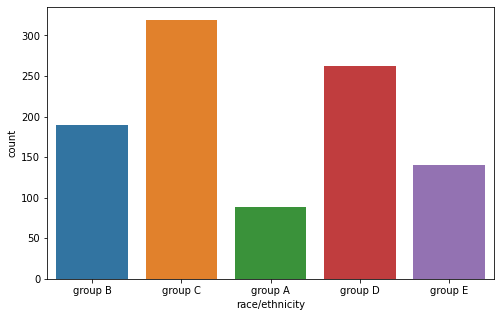

In [7]:
# comprison of race/ethnicity feature
plt.figure(figsize=(8,5))

# count rows of each classes
sns.countplot(x="race/ethnicity", data=data)

In [8]:
# count observations based on attribute
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

As we can see from the histrogram above, group C (319) > group D (262) >group B (190) > group E (140)> group A (89)

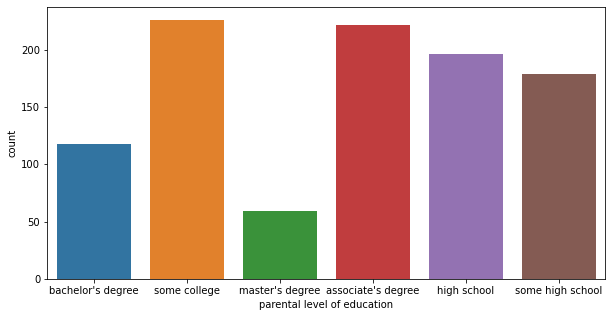

In [9]:
# comparison of parental level of education feature 
plt.figure(figsize=(10,5))

# count rows of each classes
sns.countplot(x="parental level of education", data=data)

In [10]:
# count observations based on attribute
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

some college has highest rows of data followed by associate's degree, high school, some high school, bachelor's degree, and master' degree

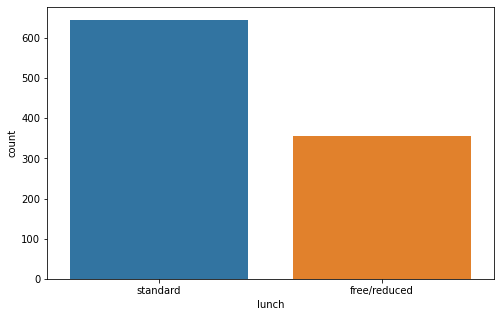

In [11]:
# comprison of lunch feature (male, female)
plt.figure(figsize=(8,5))

# count rows of each classes
sns.countplot(x="lunch", data=data)

In [12]:
# count observations based on attribute
data['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

Standard > free/reduced

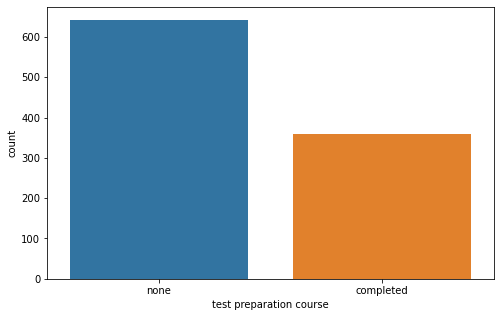

In [13]:
# comprison of lunch feature (male, female)
plt.figure(figsize=(8,5))

# count rows of each classes
sns.countplot(x="test preparation course", data=data)

In [14]:
# count observations based on attribute
data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

none > completed

Let's take a look at these score comparison on each other 

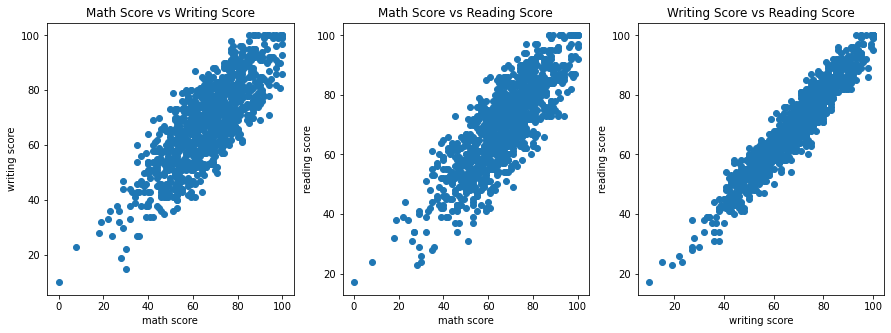

In [15]:
# size the figure to fit 3 figures on the same line
plt.figure(3,figsize=(15,5))

# subplot 1
plt.subplot(1,3,1)
# scatter plot 1
plt.scatter(x='math score', y='writing score',data=data)
plt.xlabel('math score')
plt.ylabel('writing score')
plt.title("Math Score vs Writing Score");

# subplot 2
plt.subplot(1,3,2)
#scatter plot 2
plt.scatter(x='math score', y='reading score',data=data)
plt.xlabel('math score')
plt.ylabel('reading score')
plt.title("Math Score vs Reading Score");

# subplot 3
plt.subplot(1,3,3)
#scatter plot 3
plt.scatter(x='writing score', y='reading score',data=data)
plt.xlabel('writing score')
plt.ylabel('reading score')
plt.title("Writing Score vs Reading Score");

# show the resulting plot
plt.show()

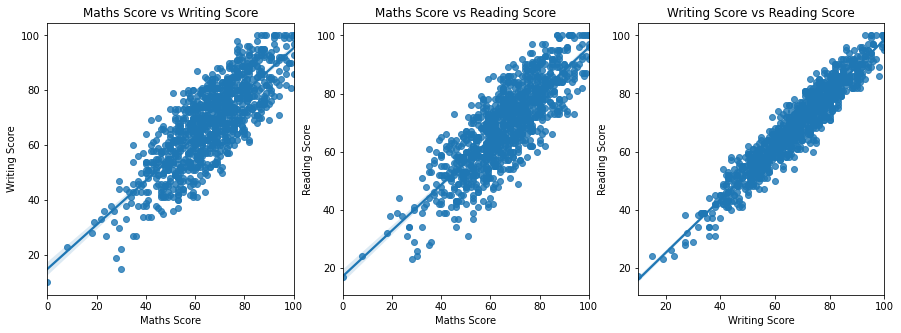

In [16]:
# size the figure to fit 3 figures on the same line
plt.figure(3,figsize=(15,5))

# subplot 1
plt.subplot(1,3,1)
#regression plot 1
sns.regplot(x='math score', y='writing score',data=data)
plt.xlabel("Maths Score")
plt.ylabel("Writing Score")
plt.title("Maths Score vs Writing Score")

# subplot 2
plt.subplot(1,3,2)
#regression plot 2
sns.regplot(x='math score', y='reading score',data=data)
plt.xlabel("Maths Score")
plt.ylabel("Reading Score")
plt.title("Maths Score vs Reading Score")

# subplot 3
plt.subplot(1,3,3)
#regression plot 3
sns.regplot(x='writing score', y='reading score',data=data)
plt.xlabel("Writing Score");
plt.ylabel("Reading Score")
plt.title("Writing Score vs Reading Score");

# show the resulting plot
plt.show()

(3.5, -0.5)

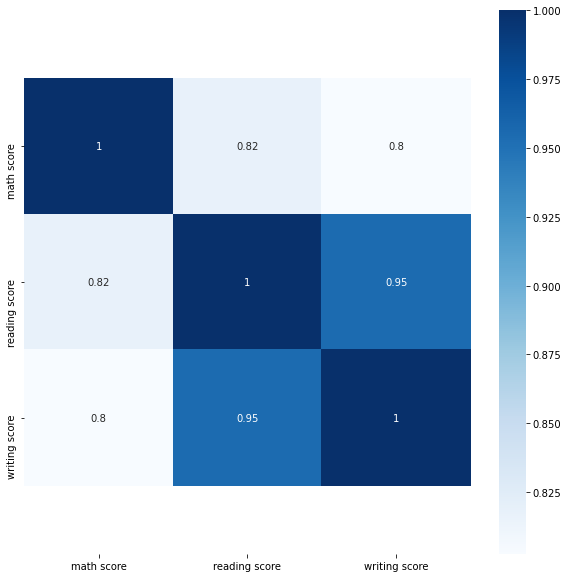

In [17]:
import seaborn as sns 

# correlations using heat map plot 
plt.figure(figsize=(10,10))
ax = sns.heatmap(data.corr(),annot=True,cmap='Blues', cbar=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Since there are some attributes in categorical type, the correlation only shows for 3 attributes which are numerical attributes

# Data preparation

1. Transforming all categorical data into numerical data

In [18]:
# convert categorical variable to numeric
data["gender_cleaned"] = np.where(data["gender"]=="male", 0, 1)
data["race/ethnicity_cleaned"] = np.where(data["race/ethnicity"]=="group A", 0,
                                         np.where(data["race/ethnicity"]=="group B", 1,
                                                np.where(data["race/ethnicity"]=="group C", 2,
                                                        np.where(data["race/ethnicity"]=="group D", 3, 4))))
data["parental_education_cleaned"] = np.where(data["parental level of education"]=="high school", 0,
                                         np.where(data["parental level of education"]=="some high school", 1,
                                                np.where(data["parental level of education"]=="some college", 2,
                                                         np.where(data["parental level of education"]=="bachelor's degree", 3,
                                                                  np.where(data["parental level of education"]=="associate's degree", 4, 5)))))
data["lunch_cleaned"] = np.where(data["lunch"]=="standard", 0, 1)
data["test_preparation_cleaned"] = np.where(data["test preparation course"]=="none", 0, 1)

In [19]:
print(data["gender_cleaned"].value_counts())
print(data["race/ethnicity_cleaned"].value_counts())
print(data["parental_education_cleaned"].value_counts())
print(data["lunch_cleaned"].value_counts())
print(data["test_preparation_cleaned"].value_counts())

1    518
0    482
Name: gender_cleaned, dtype: int64
2    319
3    262
1    190
4    140
0     89
Name: race/ethnicity_cleaned, dtype: int64
2    226
4    222
0    196
1    179
3    118
5     59
Name: parental_education_cleaned, dtype: int64
0    645
1    355
Name: lunch_cleaned, dtype: int64
0    642
1    358
Name: test_preparation_cleaned, dtype: int64


In [20]:
#combine all 3 score into 1 single score
total_score = data['writing score'] + data['reading score'] + data['math score']
data['total_score'] = total_score
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_cleaned,race/ethnicity_cleaned,parental_education_cleaned,lunch_cleaned,test_preparation_cleaned,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,1,1,3,0,0,218
1,female,group C,some college,standard,completed,69,90,88,1,2,2,0,1,247
2,female,group B,master's degree,standard,none,90,95,93,1,1,5,0,0,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,0,0,4,1,0,148
4,male,group C,some college,standard,none,76,78,75,0,2,2,0,0,229


In [21]:
#remove the old attributes after cleaned
data = data.drop(columns=['lunch','gender','race/ethnicity','parental level of education','test preparation course'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   math score                  1000 non-null   int64
 1   reading score               1000 non-null   int64
 2   writing score               1000 non-null   int64
 3   gender_cleaned              1000 non-null   int32
 4   race/ethnicity_cleaned      1000 non-null   int32
 5   parental_education_cleaned  1000 non-null   int32
 6   lunch_cleaned               1000 non-null   int32
 7   test_preparation_cleaned    1000 non-null   int32
 8   total_score                 1000 non-null   int64
dtypes: int32(5), int64(4)
memory usage: 50.9 KB


In [22]:
#feature selection using unvariate feature - f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# UNIVARIATE FEATURE SELECTION

x = data.iloc[:,:-1] # X = independent columns (potential predictors)
y = data.iloc[:,-1] # y = target column (what we want to predict)
# instantiate SelectKBest to determine 8 best features
best_features = SelectKBest(score_func=f_classif, k=8)
fit = best_features.fit(x,y)
data_scores = pd.DataFrame(fit.scores_)
data_columns = pd.DataFrame(x.columns)
# concatenate dataframes
feature_scores = pd.concat([data_columns, data_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
print(feature_scores.nlargest(8,'Score'))  # print 8 best features

                 Feature_Name      Score
1               reading score  88.333782
2               writing score  71.300666
0                  math score  29.240315
6               lunch_cleaned   1.499199
4      race/ethnicity_cleaned   1.410753
7    test_preparation_cleaned   1.299387
5  parental_education_cleaned   1.188564
3              gender_cleaned   1.027161


(9.5, -0.5)

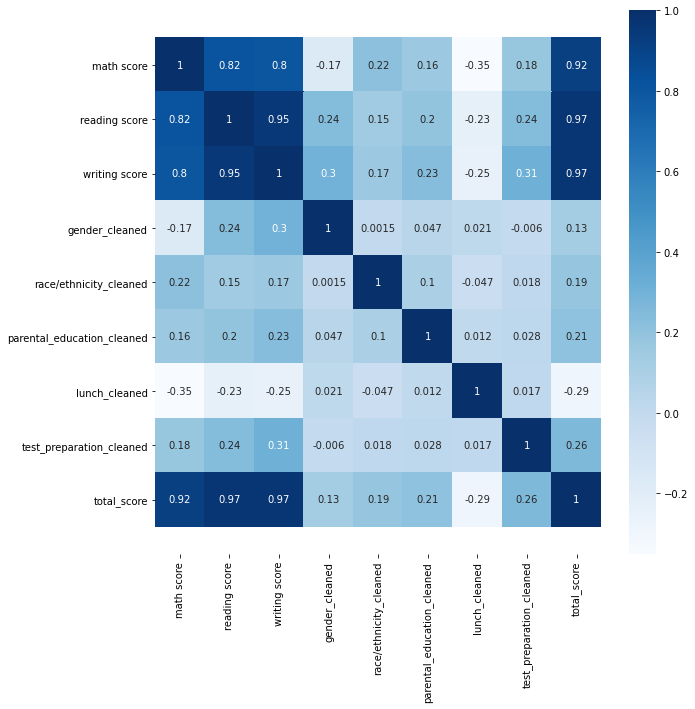

In [23]:
# correlations using heat map plot 
plt.figure(figsize=(10,10))
ax = sns.heatmap(data.corr(),annot=True,cmap='Blues', cbar=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [24]:
#get the average of total score
avg_total_score = data['total_score'] / 3
data['avg_total_score'] = avg_total_score

#drop column total score
data = data.drop(columns=['total_score'])
data.head()

,math score,reading score,writing score,gender_cleaned,race/ethnicity_cleaned,parental_education_cleaned,lunch_cleaned,test_preparation_cleaned,avg_total_score
0,72,72,74,1,1,3,0,0,72.666667
1,69,90,88,1,2,2,0,1,82.333333
2,90,95,93,1,1,5,0,0,92.666667
3,47,57,44,0,0,4,1,0,49.333333
4,76,78,75,0,2,2,0,0,76.333333


In [25]:
#change average score to classification 0 - fail, 1 - pass
passing_marks = 40
data['avg_total_score'] = np.where(data['avg_total_score'] < passing_marks ,'0','1')
data.head()

,math score,reading score,writing score,gender_cleaned,race/ethnicity_cleaned,parental_education_cleaned,lunch_cleaned,test_preparation_cleaned,avg_total_score
0,72,72,74,1,1,3,0,0,1
1,69,90,88,1,2,2,0,1,1
2,90,95,93,1,1,5,0,0,1
3,47,57,44,0,0,4,1,0,1
4,76,78,75,0,2,2,0,0,1


(8.5, -0.5)

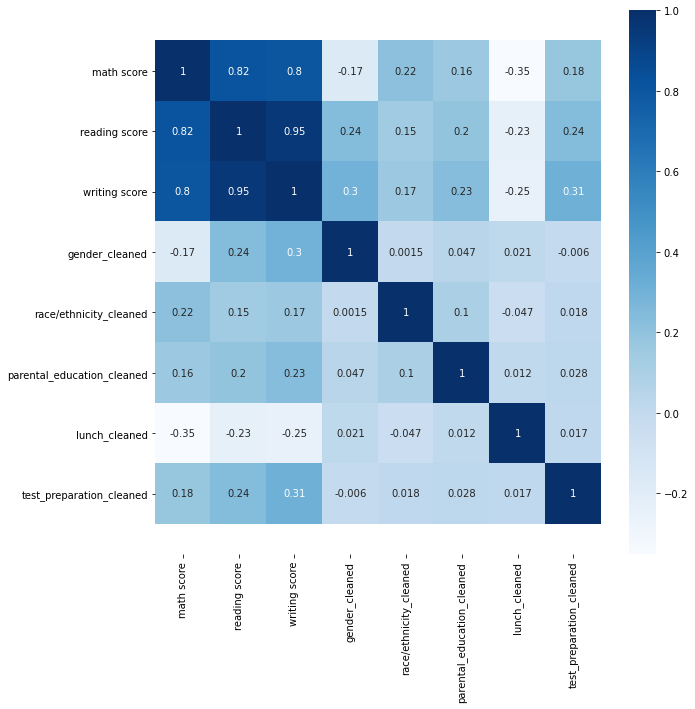

In [26]:
# correlations using heat map plot 
plt.figure(figsize=(10,10))
ax = sns.heatmap(data.corr(),annot=True,cmap='Blues', cbar=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [27]:
# import label encoder library to deal with categorical data
from sklearn.preprocessing import LabelEncoder

# select all columns except the last one (the target label)
x=data.iloc[:,:-1]

# set target categorical data label (the last attribute)
y=data.iloc[:,-1]

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
print (x)
print (y)

     math score  reading score  writing score  gender_cleaned  \
0            72             72             74               1   
1            69             90             88               1   
2            90             95             93               1   
3            47             57             44               0   
4            76             78             75               0   
..          ...            ...            ...             ...   
995          88             99             95               1   
996          62             55             55               0   
997          59             71             65               1   
998          68             78             77               1   
999          77             86             86               1   

     race/ethnicity_cleaned  parental_education_cleaned  lunch_cleaned  \
0                         1                           3              0   
1                         2                           2              0 

In [28]:
#select specific/related features
used_features=[ 
    "math score",
    "reading score",
    "writing score",
    "gender_cleaned",
    "race/ethnicity_cleaned",
    "parental_education_cleaned",
    "lunch_cleaned",
    "test_preparation_cleaned"
]

x = data[used_features] # select all attributes
y = data["avg_total_score"] #class target

display(x.shape)

(1000, 8)

Splitting the data into 70% training data and 30% test data

In [29]:
x = data [used_features]
y = data["avg_total_score"]

#import machine learning library to sample the data
from sklearn.model_selection import train_test_split

# split the data into training data and test data
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=0)